# Que 1. Predicting Price of House using KNearestNeighbour Regressor

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib as plt
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
df = pd.read_csv(url)

### 1.Use pandas to get some insights into the data (10 marks)

In [4]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [6]:
df.reset_index(drop = True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


In [7]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [8]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [10]:
x = df.shape
print("\n shape of:",x)

y = df.size
print("\n size of :",y)


 shape of: (645, 7)

 size of : 4515


In [11]:
df.rename(columns = {"Living.Room" : "Living_room"})

,Sqft,Floor,TotalFloor,Bedroom,Living_room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [12]:
df[df["Sqft"] >= 300.000]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [14]:
df.isnull().count()

Sqft           645
Floor          645
TotalFloor     645
Bedroom        645
Living.Room    645
Bathroom       645
Price          645
dtype: int64

In [15]:
df["Sqft"].value_counts()

711.600     21
925.080     13
2134.800    11
1707.840    10
2063.640    10
            ..
1106.538     1
882.384      1
665.346      1
1209.720     1
1376.946     1
Name: Sqft, Length: 288, dtype: int64

In [16]:
df["Bathroom"].value_counts()

2    386
1    198
3     46
4     10
5      4
0      1
Name: Bathroom, dtype: int64

### Show some interesting visualization of the data

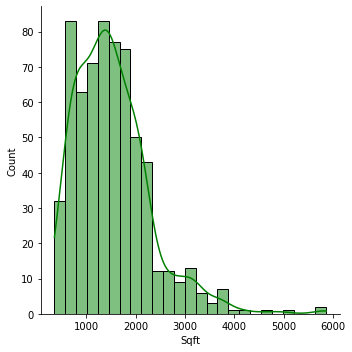

In [17]:
sns.displot(df['Sqft'],kde = True,color = "g" )

<AxesSubplot:>

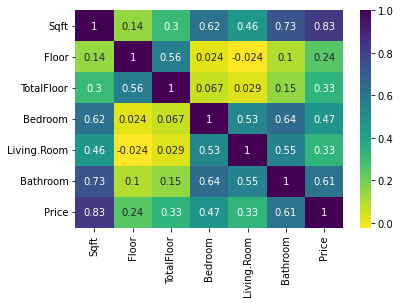

In [18]:
sns.heatmap(df.corr(), annot = True,cmap=plt.cm.get_cmap('viridis_r'))

<AxesSubplot:xlabel='Sqft', ylabel='Bathroom'>

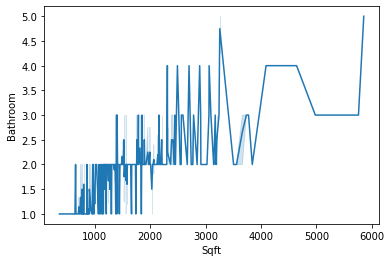

In [19]:
sns.lineplot(x = df["Sqft"], y = df["Bathroom"])

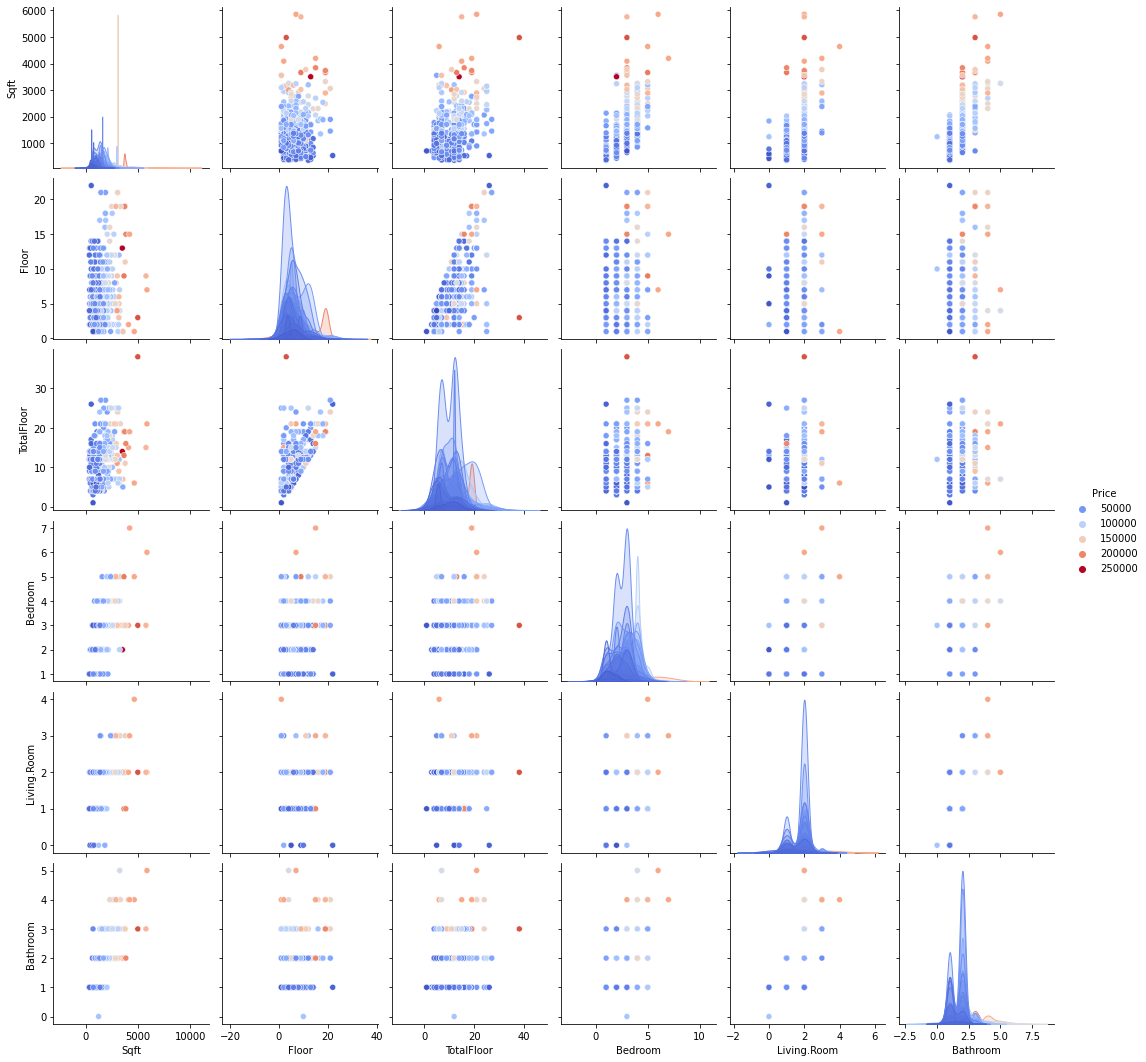

In [20]:
sns.pairplot(data = df,hue = "Price",palette = 'coolwarm')

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

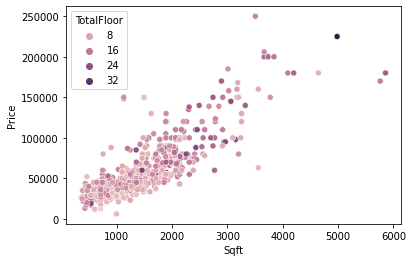

In [21]:
sns.scatterplot(data=df,x = df['Sqft'],y = df["Price"],hue = "TotalFloor")

### Manage data for training & testing

In [22]:
from scipy import stats
x = np.abs(stats.zscore(df))
print(x)

         Sqft     Floor  TotalFloor   Bedroom  Living.Room  Bathroom     Price
0    0.456393  1.014897    0.772347  0.828956     0.402694  0.276918  0.000370
1    0.791798  0.242042    0.772347  1.151328     0.402694  0.276918  0.449714
2    0.507434  0.242042    0.772347  0.828956     0.402694  1.187117  0.111966
3    0.089824  1.014897    0.772347  0.161186     0.402694  0.276918  0.477058
4    0.730160  1.303669    0.629803  0.161186     0.402694  0.276918  0.477058
..        ...       ...         ...       ...          ...       ...       ...
640  0.219747  0.273195    0.830110  0.161186     0.402694  0.276918  0.477058
641  1.500419  0.499660    0.171426  1.819099     1.761785  1.187117  1.044355
642  1.027127  1.818907    0.629803  1.819099     1.761785  1.187117  0.477058
643  0.234984  0.757279    0.629803  0.161186     0.402694  0.276918  0.084622
644  0.196547  0.015577    0.772347  0.161186     0.402694  1.187117  0.729814

[645 rows x 7 columns]


In [23]:
X = df.drop(labels = ['Price'] , axis = 1)
y = df['Price']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [25]:
scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [26]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

In [27]:
rmse = []
for k in range(1,21):
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(error)
    
    print('RMSE for k =',k,'is',error)

RMSE for k = 1 is 29540.99496665871
RMSE for k = 2 is 27748.35185227119
RMSE for k = 3 is 25216.016113624086
RMSE for k = 4 is 25280.90181865621
RMSE for k = 5 is 25181.1123285294
RMSE for k = 6 is 25372.52256577527
RMSE for k = 7 is 24967.0722916153
RMSE for k = 8 is 24243.085134076307
RMSE for k = 9 is 23655.874590709052
RMSE for k = 10 is 23679.586388104533
RMSE for k = 11 is 23715.159074252468
RMSE for k = 12 is 23482.21334347794
RMSE for k = 13 is 23456.521031022756
RMSE for k = 14 is 23533.742842493913
RMSE for k = 15 is 23474.77159877697
RMSE for k = 16 is 23328.56228228846
RMSE for k = 17 is 23292.242214415874
RMSE for k = 18 is 23214.961469474583
RMSE for k = 19 is 23090.53023474928
RMSE for k = 20 is 23032.59732647002


<AxesSubplot:>

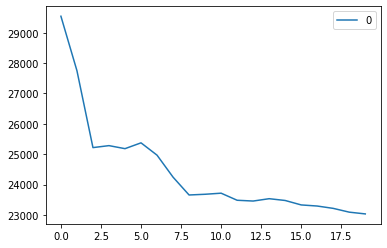

In [28]:
curve = pd.DataFrame(rmse)
curve.plot()